<a href="https://colab.research.google.com/github/Niza-Khunga/CSC-4792-Group-26/blob/main/Project_Group_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding
## 1.1 Problem Statement
 Zambian legislative documents are currently categorized and sorted manually.
 This Process is time_consuming, prone to human error, and can make it difficult for citizens, legal professionals and researchers to effeciently search for and retrieve specific types of legislation.

Our project aims to automate this classification process. By developing a machine learning model, we can accurately and efficiently classify zambian legislative documents(such as bills, acts, and statutory instruments) based on their content, thereby stramlining the retrieval of legal information. This will improve accessibility and reduce the time and effort required for manuel sorting.  


#1.2 Business Objectives
The primary objective of this project is to improve access to and organisation of Zambian legislation. By implementing an automated classification system:
1. *Enhance legal research efficiency:* enabling users to quickly locate relevant legislation by category or type.
2. *Reduce manual workload:* decreasing the time and resources spent on sorting legal documents by at least 70%.
3. *Increase public access to information:* providing non-specialists, including journalists and citizens, with user-friendly tools to find relevant laws.   

##1.3 Data Mining Goals
To achive the business objectives we need to:
1. Build a multiclass text classification model to categorise Zambian legislative documents into predifined legal categories such as Constitutional law, Criminal law and Commercial law.
2. Employ text preprocessing techniques e.g tokenization, stopword removal, stemming.
3. Use TF-IDF for feature extraction and evaluate advanced models such as BERT for semantic understanding.
4. Evaluate model performance using metrics such as F1-score, precision and recall to ensure balanced classification performance.


# 1.4 Success Criteria
The success of this project will be evaluated based on both techinical performance and its usefulness to stakeholders in the legal sector

From a technical  perspective, the classification model should achieve an accuracy =of at least 85% on the test data. additional performance metrics such as precision, recall, and F1-score will also be assessed to ensure the model is balanced and biased towards any specific catergory of legislation.
From a business perspective, the model should significantly improve the efficiency of sorting and categorizing legal documents, making it easier for legal professional, researcher and government agencies to access releveant legislation. if the model can correctly categorize atleast 8 out of 190 new legal documents during user testing it will be considered successful.
furthermore, success includes proper documentation, version control via github, an smooth intergration of the model into a usable interface or workflow.

# 2. Data Understanding

In [ ]:
import pandas as pd

# Load Dataset
df = pd.read_csv("zambian_legislation.csv")

#Check first rows
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'zambian_legislation.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

After running the cell above and following the prompts to connect to your Google Drive, you can then load the CSV file using the path to the file in your Drive. Replace `'path/to/your/folder/zambian_legislation.csv'` with the actual path to your file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load Dataset from Google Drive
# Replace 'path/to/your/folder/zambian_legislation.csv' with the actual path
df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

#Check first rows
display(df.head())

,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,ID,Title,Document Type,Text (Preamble),Category,Number,Year
1,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024
2,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024
3,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024
4,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load Dataset from Google Drive
# Replace 'path/to/your/folder/zambian_legislation.csv' with the actual path
df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

#Check first rows
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    61 non-null     object
 1   GROUP 26 LEGISLATIVE DATASET  60 non-null     object
 2   Unnamed: 2                    61 non-null     object
 3   Unnamed: 3                    61 non-null     object
 4   Unnamed: 4                    60 non-null     object
 5   Unnamed: 5                    61 non-null     object
 6   Unnamed: 6                    61 non-null     object
dtypes: object(7)
memory usage: 3.5+ KB


None

In [ ]:
display(df.describe())

,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,61,60,61,61,60,61,61
unique,61,59,7,57,47,32,5
top,ID,SUPPLEMENTARY APPROPRIATION,ACT,An Act to amend the Property Transfer Tax Act.,Finance / Taxation Law,1,2024
freq,1,2,19,2,6,3,30


In [ ]:
display(df.columns)

Index(['Unnamed: 0', 'GROUP 26 LEGISLATIVE DATASET', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [ ]:
display(df.shape)

(61, 7)

<Axes: >

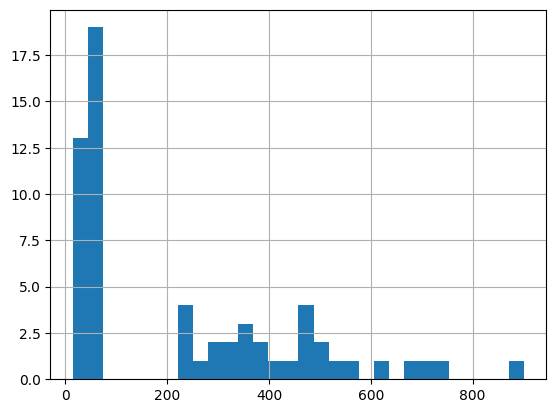

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

df['text_length'] = df['Unnamed: 3'].str.len()
df['text_length'].hist(bins=30)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Axes: xlabel='Unnamed: 2'>

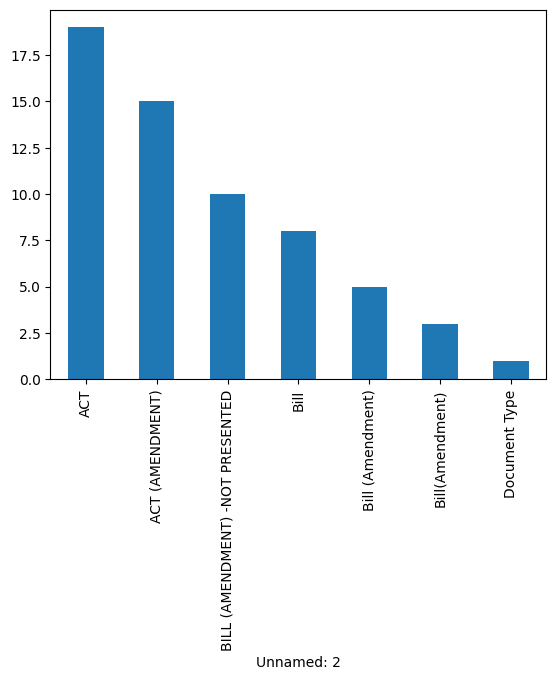

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

df['Unnamed: 2'].value_counts().plot(kind='bar')

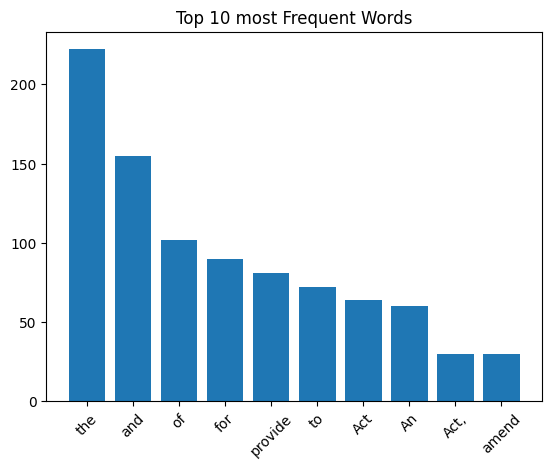

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

all_words = ' '.join(df['Unnamed: 3']).split()
word_freq = Counter(all_words).most_common(10)

words, counts = zip(*word_freq)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 10 most Frequent Words")
plt.show()

# 2.1 Overview of Dataset

### The dataset contains a collecction of Zambian legislation documents, including Acts and Bills. Each row represnts a single piece of legislation, with columns for:
 **Title**: The official title of the Act or Bill.
 **Text**: Full or partial text of the legislation
 **category**: the assigned Category for classification (e.g., Finance, Labour, Trade, Security, etc.).

###Initial exploration helps identify structure, completeness and characteristics of the data

#2.2 Data Exploration

**Number of records**: 60
**Columns**:Title, Text, Category
**Missing values**: Some documents have missing or very short text
**Distribution of categories**: Unequal representation; some categories are underrepresented
**Text length**: High variability, indicating some Acts are very short, others very long

# 2.2 Summary of initial findings
**Dataset size**: 60rows x 7 columns
**Category distribution**: Most documents are of Finance or Labour Acts. categories like Security and NGOs have got fewer examples
**Text completeness**: A few Acts have missing text ot extremely short descriptions
**Length variation**: Text lengths vary widely (Certain Acts have a lot of pages while some have a few paragraphs)
##**Implications**:
Some preprocessing will be necessary (removing or padding short texts)
Categories may need balancing for classification models
visualizations help identify patterns in category distribution and text lengths


# 3. Data Preparation

### Document Data Cleaning Decisions
- We dropped missing values because models cannot learn from incomplete records and imputation was not suitable since the text represents unique legal Content.
- We removed duplicate Acts because they would bias the classifier toward repeated categories.
- We excluded very short texts (under 20 characters) since they don't carry enough legal meaning to support classification.

**Handle missing values and remove duplicates**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load Dataset from Google Drive
# Replace 'path/to/your/folder/zambian_legislation.csv' with the actual path
df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

#remove duplicates
df = df.drop_duplicates()
display(df.head())

,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,ID,Title,Document Type,Text (Preamble),Category,Number,Year
1,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024
2,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024
3,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024
4,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024


In [ ]:
#drop rows where text or legislation is missing
df = df.dropna(subset=['Unnamed: 2', 'Unnamed: 3'])
display(df.head())

,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,ID,Title,Document Type,Text (Preamble),Category,Number,Year
1,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024
2,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024
3,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024
4,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load Dataset from Google Drive

df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

# Remove very short texts (less than 20 characters)
df = df[df['Unnamed: 3'].str.len() > 20]
display(df.head())

,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024
2,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024
3,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024
4,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024
5,5,PROPERTY TRANSFER TAX (AMENDMENT),ACT (AMENDMENT),An Act to amend the Property Transfer Tax Act.,Finance / Taxation Law,27,2024


In [ ]:
# Standardise text
df['Unnamed: 3'] = df['Unnamed: 3'].str.lower()
display(df.head())

,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,an act to provide for the registration of quan...,Professional Regulation,19,2024
2,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,an act to provide for climate change adaptatio...,Environmental Law,18,2024
3,3,APPROPRIATION,ACT,an act to authorise expenditure from the conso...,Finance / Appropriation Law,29,2024
4,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),an act to amend the insurance premium levy act...,Finance / Taxation Law,28,2024
5,5,PROPERTY TRANSFER TAX (AMENDMENT),ACT (AMENDMENT),an act to amend the property transfer tax act.,Finance / Taxation Law,27,2024


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Load Dataset from Google Drive
# Replace 'path/to/your/folder/zambian_legislation.csv' with the actual path
df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

# Add new features
df['text_length'] = df['Unnamed: 3'].str.len()
df['word_count'] = df['Unnamed: 3'].str.split().apply(len)

# Example: extracting year if present in title
df['Unnamed: 6'] = df['Unnamed: 6'].astype(str).str.extract(r'(\d{4})')
display(df.head())

Mounted at /content/drive


,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,text_length,word_count
0,ID,Title,Document Type,Text (Preamble),Category,Number,NaN,15,2
1,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024,475,67
2,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024,479,67
3,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024,331,51
4,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024,53,10


**We added text_length and word_count because the length of Text (Preamble) often reflects their complexity, which may help distinguish categories.
We extracted the year from Acts titles to capture potential temporal patterns.**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CSC 4792-Project Group 26/Zambian Legislative Documents/zambian_legislation.csv')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

#Encode categories
le = LabelEncoder()
df['LegislationType_encoded'] = le.fit_transform(df['Unnamed: 2'])

#Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = vectorizer.fit_transform(df['Unnamed: 3'])
display(df.head())

,Unnamed: 0,GROUP 26 LEGISLATIVE DATASET,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,LegislationType_encoded
0,ID,Title,Document Type,Text (Preamble),Category,Number,Year,6
1,1,THE ZAMBIA INSTITUTE OF QUANTITY\n SURVEYORS ...,ACT,An Act to provide for the registration of quan...,Professional Regulation,19,2024,0
2,2,"THE GREEN ECONOMY AND CLIMATE CHANGE ACT, 2024",ACT,An Act to provide for climate change adaptatio...,Environmental Law,18,2024,0
3,3,APPROPRIATION,ACT,An Act to authorise expenditure from the Conso...,Finance / Appropriation Law,29,2024,0
4,4,INSURANCE PREMIUM LEVY (AMENDMENT),ACT (AMENDMENT),An Act to amend the Insurance Premium Levy Act...,Finance / Taxation Law,28,2024,1


### Why We choose These Steps
- Missing values were dropped to maintain data quality.
- Very Short Text(Preamble under 20 characters) were removed as they are unlikely to contribute meaningful signals.
- TF-IDF vectorization was chosen because it balances word frequency and uniqueness, making classification more effective